In [1]:
import numpy as np
import scipy as sp
from scipy.stats import unitary_group
import torch
from opt_einsum import contract
import qutip as qt
from qutip import Bloch
from itertools import combinations
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib import rc
rc('text', usetex=True)
rc('axes', linewidth=3)

In [2]:
def bloch_xyz(inputs):
    # obtain bloch sphere representation vector
    rho = contract('mi,mj->mij', inputs, inputs.conj())
    sigmas = [qt.sigmax().full(), qt.sigmay().full(), qt.sigmaz().full()]
    pos = [np.real(contract('mii->m', contract('mij,jk->mik', rho, x))) for x in sigmas]
    return pos

Cluster problem close to |0>

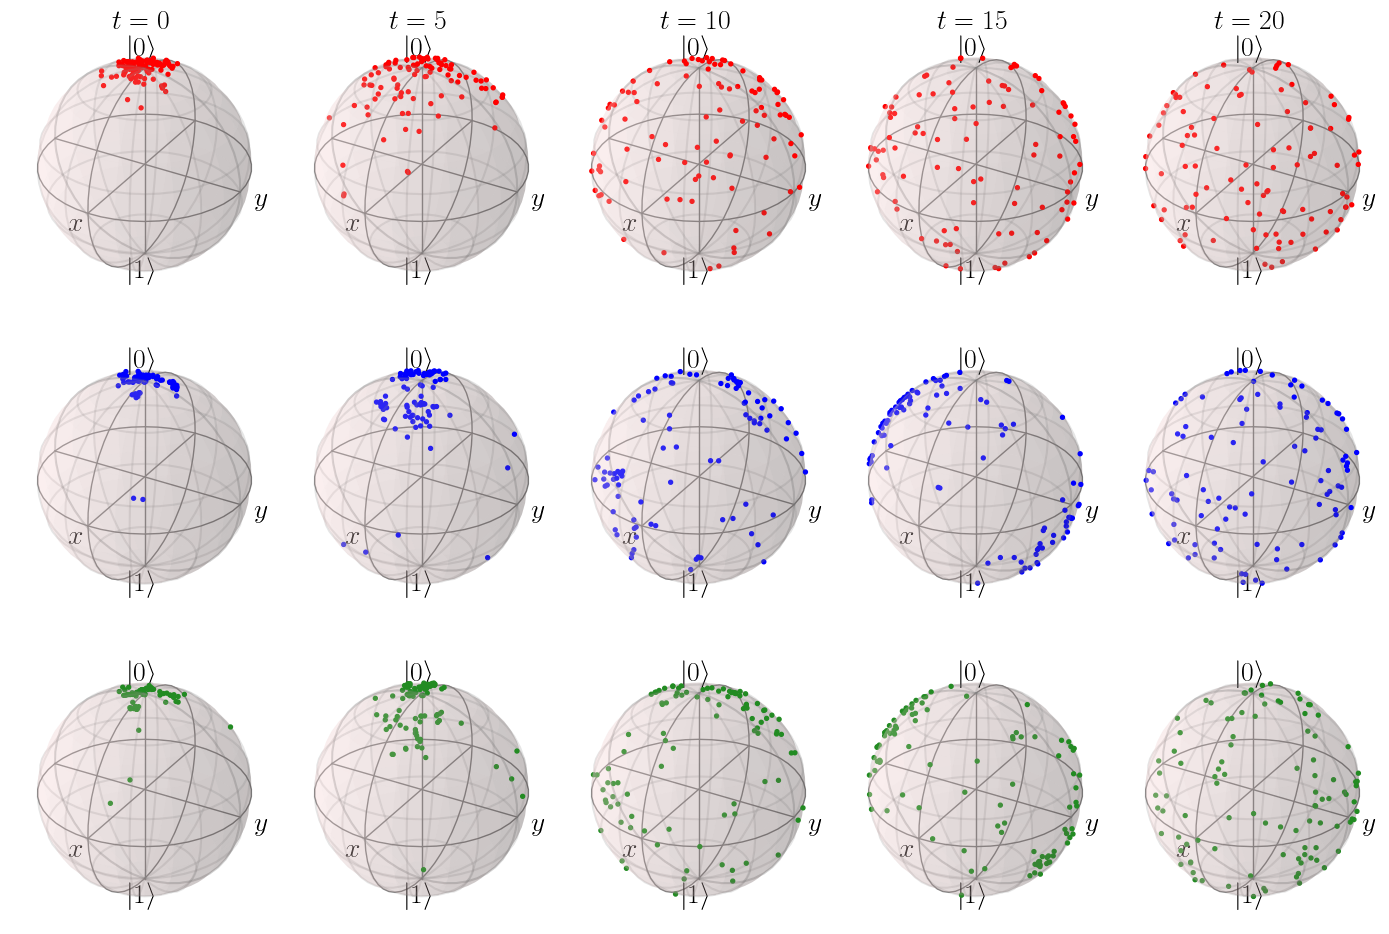

In [3]:
# bloch visualize on the backward denoise process
T = 20
L = 4
Ndata = 100
method = 'nat'
indices = np.random.choice(1000, Ndata, replace=False)
states_diff = np.load('data/QDDPM/cluster0/n1/cluster0Diff_n1T%d_N1000.npy'%T)[:,indices]
data_gen_tr = np.load('data/QDDPM/cluster0/n1/QDDPMcluster0trainGen_n1na1T%dL%d_%s.npy'\
                      %(T, L, method))
data_gen_te = np.load('data/QDDPM/cluster0/n1/QDDPMcluster0testGen_n1na1T%dL%d_%s.npy'\
                      %(T, L, method))

fig, axs = plt.subplots(3,5, figsize=(14,10), subplot_kw={'projection': '3d'})
cc = 0
for i in range(0, T+1, 5):
    xs0, ys0, zs0 = bloch_xyz(states_diff[i])
    xs1, ys1, zs1 = bloch_xyz(data_gen_tr[i])
    xs2, ys2, zs2 = bloch_xyz(data_gen_te[i])
    b0 = Bloch(fig=fig, axes=axs[0,cc])
    b0.clear()
    b0.add_points([xs0, ys0, zs0])
    b0.point_color = ['r']*Ndata
    b0.point_style = 'm'
    b0.point_size = 8*np.ones(Ndata)
    b0.render()
    b1 = Bloch(fig=fig, axes=axs[1,cc])
    b1.clear()
    b1.add_points([xs1, ys1, zs1])
    b1.point_color = ['b']*Ndata
    b1.point_style = 'm'
    b1.point_size = 8*np.ones(Ndata)
    b1.render()
    b2 = Bloch(fig=fig, axes=axs[2,cc])
    b2.clear()
    b2.add_points([xs2, ys2, zs2])
    b2.point_color = ['forestgreen']*Ndata
    b2.point_style = 'm'
    b2.point_size = 8*np.ones(Ndata)
    b2.render()
    axs[0,cc].set_title(r'$t=%d$'%i, fontsize=20)
    cc += 1
plt.tight_layout()
plt.savefig('figures/QDDPMcluster0Bloch_n1na1T%dL%d.pdf'%(T, L), bbox_inches='tight')
plt.show()
plt.close()

Visualize the result of Quantum direct transport

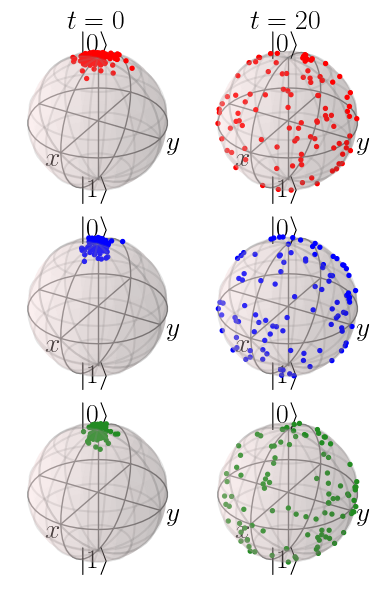

In [11]:
T = 20
L = 80
Ndata = 100
method = 'nat'
indices = np.random.choice(1000, Ndata, replace=False)
states_diff = np.load('data/QDDPM/cluster0/n1/cluster0Diff_n1T%d_N1000.npy'%T)[:,indices]
data_gen_tr = np.load('data/QDT/cluster0/n1/QDTcluster0trainGen_n1na1T%dL%d_%s.npy'\
                      %(T, L, method))
data_gen_te = np.load('data/QDT/cluster0/n1/QDTcluster0testGen_n1na1T%dL%d_%s.npy'\
                      %(T, L, method))

fig, axs = plt.subplots(3,2, figsize=(4,6), subplot_kw={'projection': '3d'})
for i in range(2):
    xs0, ys0, zs0 = bloch_xyz(states_diff[i*T])
    xs1, ys1, zs1 = bloch_xyz(data_gen_tr[i])
    xs2, ys2, zs2 = bloch_xyz(data_gen_te[i])
    b0 = Bloch(fig=fig, axes=axs[0,i])
    b0.clear()
    b0.add_points([xs0, ys0, zs0])
    b0.point_color = ['r']*Ndata
    b0.point_style = 'm'
    b0.point_size = 8*np.ones(Ndata)
    b0.render()
    b1 = Bloch(fig=fig, axes=axs[1,i])
    b1.clear()
    b1.add_points([xs1, ys1, zs1])
    b1.point_color = ['b']*Ndata
    b1.point_style = 'm'
    b1.point_size = 8*np.ones(Ndata)
    b1.render()
    b2 = Bloch(fig=fig, axes=axs[2,i])
    b2.clear()
    b2.add_points([xs2, ys2, zs2])
    b2.point_color = ['forestgreen']*Ndata
    b2.point_style = 'm'
    b2.point_size = 8*np.ones(Ndata)
    b2.render()
    axs[0, i].set_title(r'$t=%d$'%(i*T), fontsize=20)
plt.tight_layout()
plt.savefig('figures/QDTcluster0Bloch_n1na1T%dL%d.pdf'%(T, L), bbox_inches='tight')
plt.show()
plt.close()

Uniform distribution on a circle perpendicular to Y-axis

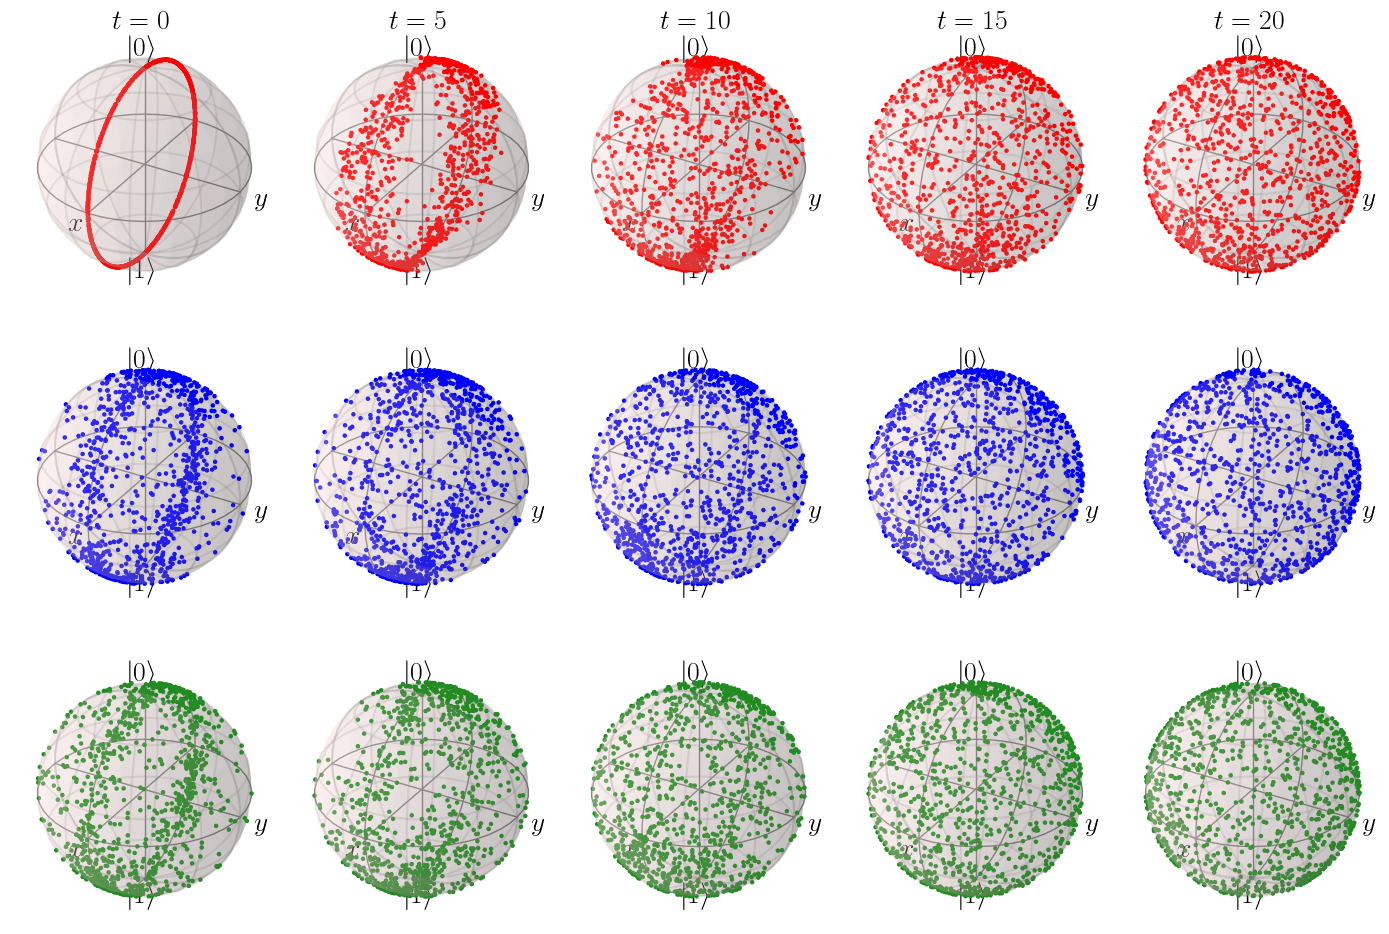

In [5]:
# bloch visualize on the backward denoise process
T = 20
Ndata = 1000
method = 'wd'
indices = np.random.choice(10000, Ndata, replace=False)
states_diff = np.load('data/QDDPM/circle/n1/circleYDiff_n1T20_N10000.npy')[:, indices]
data_gen_tr = np.load('data/QDDPM/circle/n1/QDDPMcircleYtraingen_n1na1T20L4_wd.npy')
data_gen_te = np.load('data/QDDPM/circle/n1/QDDPMcircleYtestgen_n1na1T20L4_wd.npy')
fig, axs = plt.subplots(3,5, figsize=(14,10), subplot_kw={'projection': '3d'})

xs, ys, zs = [], [], []
cc = 0
for i in range(0, T+1, 5):
    xs0, ys0, zs0 = bloch_xyz(states_diff[i])
    xs1, ys1, zs1 = bloch_xyz(data_gen_tr[i])
    xs2, ys2, zs2 = bloch_xyz(data_gen_te[i])
    b0 = Bloch(fig=fig, axes=axs[0,cc])
    b0.clear()
    b0.add_points([xs0, ys0, zs0])
    b0.point_color = ['r']*Ndata
    b0.point_style = 'm'
    b0.point_size = 5*np.ones(Ndata)
    b0.render()
    b1 = Bloch(fig=fig, axes=axs[1,cc])
    b1.clear()
    b1.add_points([xs1, ys1, zs1])
    b1.point_color = ['b']*Ndata
    b1.point_style = 'm'
    b1.point_size = 5*np.ones(Ndata)
    b1.render()
    b2 = Bloch(fig=fig, axes=axs[2,cc])
    b2.clear()
    b2.add_points([xs2, ys2, zs2])
    b2.point_color = ['forestgreen']*Ndata
    b2.point_style = 'm'
    b2.point_size = 5*np.ones(Ndata)
    b2.render()
    axs[0,cc].set_title(r'$t=%d$'%i, fontsize=20)
    cc += 1
plt.tight_layout()
plt.savefig('figures/QDDPMcircleYBloch_n1na1T%dL%d_%s.pdf'%(T, L, method), bbox_inches='tight')
plt.show()
plt.close()

Visualize quantum direct transport result

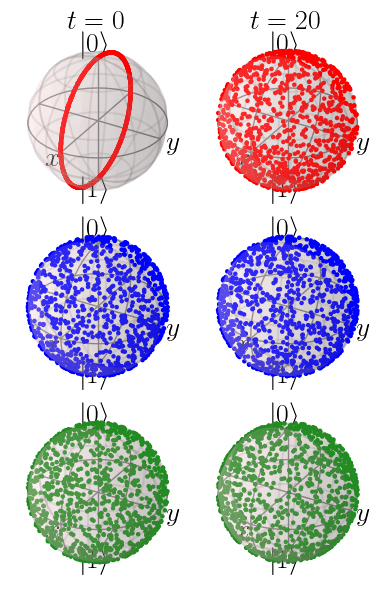

In [3]:
T = 20
L = 80
Ndata = 1000
method = 'wd'
indices = np.random.choice(10000, Ndata, replace=False)
states_diff = np.load('data/QDDPM/circle/n1/circleYDiff_n1T20_N10000.npy')[:, indices]
data_gen_tr = np.load('data/QDT/circle/n1/QDTcircleYtrainGen_n1na1T%dL%d_%s.npy'\
                      %(T, L, method))
data_gen_te = np.load('data/QDT/circle/n1/QDTcircleYtestGen_n1na1T%dL%d_%s.npy'\
                      %(T, L, method))

fig, axs = plt.subplots(3,2, figsize=(4,6), subplot_kw={'projection': '3d'})
for i in range(2):
    xs0, ys0, zs0 = bloch_xyz(states_diff[i*T])
    xs1, ys1, zs1 = bloch_xyz(data_gen_tr[i])
    xs2, ys2, zs2 = bloch_xyz(data_gen_te[i])
    b0 = Bloch(fig=fig, axes=axs[0,i])
    b0.clear()
    b0.add_points([xs0, ys0, zs0])
    b0.point_color = ['r']*Ndata
    b0.point_style = 'm'
    b0.point_size = 5*np.ones(Ndata)
    b0.render()
    b1 = Bloch(fig=fig, axes=axs[1,i])
    b1.clear()
    b1.add_points([xs1, ys1, zs1])
    b1.point_color = ['b']*Ndata
    b1.point_style = 'm'
    b1.point_size = 5*np.ones(Ndata)
    b1.render()
    b2 = Bloch(fig=fig, axes=axs[2,i])
    b2.clear()
    b2.add_points([xs2, ys2, zs2])
    b2.point_color = ['forestgreen']*Ndata
    b2.point_style = 'm'
    b2.point_size = 5*np.ones(Ndata)
    b2.render()
    axs[0, i].set_title(r'$t=%d$'%(i*T), fontsize=20)
plt.tight_layout()
plt.savefig('figures/QDTcircleYBloch_n1na1T%dL%d.pdf'%(T, L), bbox_inches='tight')
plt.show()
plt.close()